In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:

df_veh = pd.read_csv("vehicle//training_vehicle.csv")

df_veh['mean'] = df_veh.iloc[:, 1:].mean(axis=1)
df_veh['std'] = df_veh.iloc[:, 1:].std(axis=1)

df_veh


,steps,run0,run1,run2,run3,run4,mean,std
0,4096,70.493568,67.591606,76.296295,78.395615,67.530571,72.061531,4.494934
1,8192,78.173431,68.820030,67.397850,65.281326,65.359306,69.006389,4.771459
2,12288,74.725197,74.846832,85.190788,68.139519,61.624828,72.905433,7.848267
3,14336,84.140442,62.292141,90.037628,71.515060,65.166817,74.630418,10.764023
4,18432,69.782692,76.105919,82.441162,75.107101,66.014969,73.890369,5.628501
...,...,...,...,...,...,...,...,...
826,2486272,239.106766,234.993530,248.310593,292.338226,238.425949,250.635013,21.312807
827,2488320,258.966370,225.767441,220.009674,268.148407,258.998230,246.378024,19.553883
828,2490368,289.691773,215.708191,209.454392,286.987396,218.850952,244.138541,36.226671
829,2498560,310.298279,217.623016,231.942444,251.686295,236.518356,249.613678,32.230665


In [3]:

df_rob = pd.read_csv("robot//training_robot.csv")

df_rob['mean'] = df_rob.iloc[:, 1:].mean(axis=1)
df_rob['std'] = df_rob.iloc[:, 1:].std(axis=1)
df_rob.head()

,steps,run0,run1,run2,run3,run4,mean,std
0,2048,377.906067,454.960327,428.346680,357.191467,420.164978,407.713904,35.366620
1,4096,432.983673,374.913574,400.367310,402.707703,385.087128,399.211877,19.718043
2,6144,468.771118,400.914917,419.617737,473.551300,379.756317,428.522278,37.059838
3,8192,470.205109,405.765839,378.970581,482.855774,428.489563,433.257373,38.860542
4,10240,434.749908,403.049683,400.742737,477.941376,469.795074,437.255756,32.322321


In [4]:
def plot_convergence(dfs, stats_names):
    """
    Function for plotting the convergence of the algorithms
    It takes a list of dataframes and a list of names for the dataframes, and plots the mean and
    standard deviation of the dataframes
    
    :param dfs: a list of dataframes, each containing the mean and standard deviation of the fitness of
    the population at each generation
    :param stats_names: The names of the algorithms
    """
    fig, ax = plt.subplots()

    plt.xlabel("Number of steps x 1/1000", fontsize=14)
    plt.ylabel("Average reward per episode", fontsize=14)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.grid()

    for i, df in enumerate(dfs):
        #x = np.arange(0, len(dfs[i]["mean"]))
        x = np.array(df["steps"]/1000)
        plt.plot(x, dfs[i]["mean"], label=stats_names[i], color="g")
        plt.fill_between(x, dfs[i]["mean"] - dfs[i]["std"], dfs[i]["mean"] + dfs[i]["std"], alpha=0.3, color="g")
        #plt.legend()
    plt.savefig('convergence_veh.png')

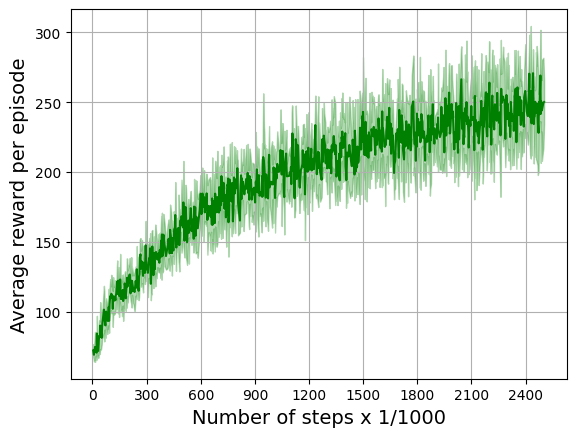

In [5]:
plot_convergence([df_veh], ["robot"])